In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_selection import RFE

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score


from sklearn.metrics import classification_report

In [19]:
corpus = []
labels = []
urls = []
# files = [
#     'kamerstukken_topics-multi_20120101_20120630.json',
#     'kamerstukken_topics-multi_20130101_20130630.json',
#     'kamerstukken_topics-multi_20140101_20141231.json',
#     'kamerstukken_topics-multi_20160602_20161201.json',
#     'kamerstukken_topics-multi_20160101_20160601.json',
#     'kamerstukken_topics-multi_20170101_20170301.json',
#     'kamerstukken_topics-multi_20170302_20170601.json',
#     'kamerstukken_topics-multi_20170602_20180101.json',
#     'kamerstukken_topics-multi_20180101_20180401.json'
# ]

files = [
    'kamerstukken_topics-multi_20120101_20120630.json',
    'kamerstukken_topics-multi_20120701_20121231.json',
    'kamerstukken_topics-multi_20130101_20130630.json',
    'kamerstukken_topics-multi_20130701_20131231.json',
    'kamerstukken_topics-multi_20140101_20141231.json',
    'kamerstukken_topics-multi_20150101_20150630.json',
    'kamerstukken_topics-multi_20150701_20151231.json',
    'kamerstukken_topics-multi_20160101_20160601.json',
    'kamerstukken_topics-multi_20160602_20161201.json',
    'kamerstukken_topics-multi_20170101_20170301.json',
    'kamerstukken_topics-multi_20170302_20170601.json',
    'kamerstukken_topics-multi_20170602_20180101.json',
    'kamerstukken_topics-multi_20180101_20180401.json',
]

for file in files:
    data = json.load(open('../../data_resources/topics/kamerstukken/{}'.format(file)))
    for obj in data:
        if len(obj['categories']) > 0 and 'Antwoord' not in obj['content']:
            urls.append(obj['url'])
            corpus.append(obj['content'])
            labels.append(obj['categories'])



print(len(corpus))
print(len(labels))

20489
20489


# TEXT REP

In [25]:
transformer = TfidfVectorizer(max_df=0.7, preprocessor=pre_process)
transformer_count = CountVectorizer()
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)
X_train_corpus, X_test_corpus, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)

X_train = transformer.fit_transform(X_train_corpus)
X_test = transformer.transform(X_test_corpus)

clf = SGDClassifier(loss='log', penalty='none', alpha=1e-6, random_state=42, max_iter=10)
clf = OneVsRestClassifier(clf).fit(X_train, y_train)

score = precision_recall_fscore_support(y_test, clf.predict(X_test), average='micro')
print(score)

(0.7900874635568513, 0.5607863424728401, 0.6559757942511346, None)


In [11]:
def pre_process(s):
    result = ''.join([i for i in s if not i.isdigit()])
    return result.upper()
#     return result

In [12]:
# transformer = TfidfVectorizer(smooth_idf=False, min_df=0.0001, max_df=0.8, sublinear_tf=False, preprocessor=pre_process)


transformer = TfidfVectorizer(max_df=0.7, preprocessor=pre_process)
transformer_count = CountVectorizer()


clf = SGDClassifier(loss='log', penalty='none', alpha=1e-6, random_state=42, max_iter=10)


In [13]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)

In [28]:
labels = []
a = mlb.inverse_transform(y)

counter = {}

for multi_labels in a:
    
    for label in multi_labels:
        if label in counter:
            counter[label] += 1
        else:
            counter[label] = 0
    
for obj in counter:
    print('{},{}'.format(obj, counter[obj]))

Openbare orde en veiligheid | Politie, brandweer en hulpdiensten,466
Internationaal | Organisatie en beleid,803
Zorg en gezondheid | Gezondheidsrisico's,287
Zorg en gezondheid | Ouderen,129
Zorg en gezondheid | Verzekeringen,247
Economie | Overige economische sectoren,440
Natuur en milieu | Energie,316
Zorg en gezondheid | Organisatie en beleid,1501
Cultuur en recreatie | Media,160
Cultuur en recreatie | Religie,268
Recht | Staatsrecht,603
Economie | Markttoezicht,148
Verkeer | Luchtvaart,175
Openbare orde en veiligheid | Criminaliteit,967
Financiën | Belasting,430
Onderwijs en wetenschap | Onderzoek en wetenschap,48
Internationaal | Defensie,277
Onderwijs en wetenschap | Hoger onderwijs,205
Economie | Handel,222
Migratie en integratie | Immigratie,455
Onderwijs en wetenschap | Organisatie en beleid,282
Financiën | Financieel toezicht,165
Huisvesting | Organisatie en beleid,134
Recht | Strafrecht,472
Cultuur en recreatie | Sport,193
Natuur en milieu | Natuur- en landschapsbeheer,281
Op

In [14]:
X_train_corpus, X_test_corpus, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)

In [15]:
X_train = transformer.fit_transform(X_train_corpus)
X_test = transformer.transform(X_test_corpus)

# clf = RFE(clf, 68520)
# clf = OneVsRestClassifier(rfe).fit(X_train, y_train)

clf = OneVsRestClassifier(clf).fit(X_train, y_train)

In [17]:
score = precision_recall_fscore_support(y_test, clf.predict(X_test), average='micro')
print(score)

(0.7900874635568513, 0.5607863424728401, 0.6559757942511346, None)


# Classifiers

In [26]:
def scorer(estimator, X, y):
    precision, recall, f1, _ = precision_recall_fscore_support(y, estimator.predict(X), average='micro')
    return f1
    

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=2, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")
    
    
    
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scorer)
    

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    print(train_scores)
    print(np.shape(train_scores_mean))

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [27]:
clf_names = [
    'SVM',
#     'Decision tree',
#     'Random forest'
]

clfs = [
    SGDClassifier(loss='log', penalty='none', alpha=1e-6, max_iter=10),
#     DecisionTreeClassifier(max_depth=100), # 45% 100, all
#     RandomForestClassifier(max_depth=50, max_features=3000) # 44% 50, 3000
]

/home/rothweiler/.local/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 11 is present in all training examples.
  str(classes[c]))
/home/rothweiler/.local/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 45 is present in all training examples.
  str(classes[c]))
/home/rothweiler/.local/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 86 is present in all training examples.
  str(classes[c]))


[[0.99956766]
 [0.99957118]
 [0.99957112]
 [0.99962545]
 [0.99961527]
 [0.99967927]
 [0.99954183]
 [0.99954525]
 [0.9995003 ]
 [0.99952848]]
(10,)
SGDClassifier(alpha=1e-06, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


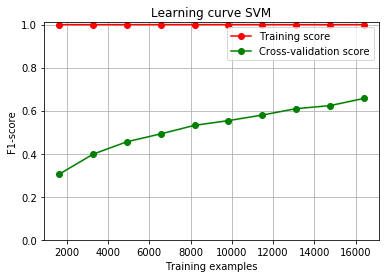

In [28]:
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for i in range(0,len(clfs)):
#     %time estimator = OneVsRestClassifier(clfs[i]).fit(X_train, y_train)
#     score = precision_recall_fscore_support(y_test, estimator.predict(X_test), average='micro')
    
    estimator = OneVsRestClassifier(clfs[i])
    
    X = transformer.fit_transform(corpus)
    plot_learning_curve(estimator, 'Learning curve {}'.format(clf_names[i]), X, y, ylim=(0.0, 1.01), cv=cv, n_jobs=1)

    print(clfs[i])
#     print(score)

In [57]:
print('a')

a


# Ensemble learning

In [32]:
from sklearn.ensemble import VotingClassifier

In [33]:
clf_names = [
    'SVM',
    'Decision tree',
    'Random forest'
]

clfs = [
    SGDClassifier(loss='log', penalty='none', alpha=1e-6, max_iter=10),
    DecisionTreeClassifier(max_depth=100), # 45% 100, all
    RandomForestClassifier(max_depth=50, max_features=3000) # 44% 50, 3000
]

In [34]:
parameters = [
#     {'weights' : [1,1,1], 'voting': 'soft'},
#     {'weights' : [2,1,1], 'voting': 'soft'},
    {'weights' : [3,1,1], 'voting': 'soft'},
#     {'weights' : [3,2,1], 'voting': 'soft'},
#     {'weights' : [3,1,0], 'voting': 'soft'},
#     {'weights' : [4,1,1], 'voting': 'soft'},
]

for param in parameters:
    
    clf_complete = VotingClassifier(estimators=[('SVM', clfs[0]), ('DT', clfs[1]), ('RF', clfs[2])], 
                             voting=param['voting'], weights=param['weights'],)

    estimator = OneVsRestClassifier(clf_complete).fit(X_train, y_train)
    
    score = precision_recall_fscore_support(y_test, estimator.predict(X_test), average='micro')
    print(param)
    print(score)

KeyboardInterrupt: 

In [19]:
score = precision_recall_fscore_support(y_test, estimator.predict(X_test), average='micro')
print(score)

(0.8304882890035729, 0.5220863488894435, 0.6411277965062826, None)


# Transformer - Text representation

In [1]:
transformer.get_feature_names()

NameError: name 'transformer' is not defined

In [74]:
# X_train = transformer_count.fit_transform(X_train_corpus)
# X_test = transformer_count.transform(X_test_corpus)
# clf = OneVsRestClassifier(clf).fit(X_train, y_train)
# print(precision_recall_fscore_support(y_test, clf.predict(X_test), average='micro'))

In [10]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [11]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

top_feats_in_doc(X_train, transformer.get_feature_names(), 0)

,feature,tfidf
0,SELECTIE,0.447368
1,STUDENTEN,0.290947
2,DUPEERT,0.278985
3,POORT,0.253168
4,ALLOCHTONEN,0.247101
5,ONDERWIJS,0.245040
6,TWEEDELING,0.164734
7,TROUW,0.160633
8,MOHANDIS,0.155639
9,HOGER,0.154677


In [12]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

top_mean_feats(X_train, transformer.get_feature_names())

,feature,tfidf
0,MONDELINGE,0.009620
1,GEMEENTEN,0.006275
2,KINDEREN,0.005162
3,POLITIE,0.005014
4,ZORG,0.004927
5,ONDERWIJS,0.004905
6,NEDERLAND,0.003875
7,EU,0.003723
8,KLAVEREN,0.003687
9,ONDERZOEK,0.003652


In [14]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = []
        for i in range(0,len(y)):
            if y[i] == label:
                ids.append(i)
        
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs


labels = []
a = mlb.inverse_transform(y_train)

for obj in a:
    labels.append(obj[0])

    
for df in top_feats_by_class(X_train, labels, transformer.get_feature_names()):
    print(df.label)
    print(df)

Bestuur | De Nederlandse Antillen en Aruba
           feature     tfidf
0          CURAÇAO  0.116765
1            ARUBA  0.087824
2             SINT  0.070291
3          BONAIRE  0.061498
4          MAARTEN  0.058650
5     RAFFINADERIJ  0.040988
6             SABA  0.036637
7        EUSTATIUS  0.033548
8              BES  0.021148
9         EILANDEN  0.021046
10             UTS  0.019582
11        HOEVERRE  0.019342
12          CASINO  0.017917
13       CARIBISCH  0.017898
14          BOSMAN  0.016609
15           ENNIA  0.015215
16         CURACAO  0.014934
17      FINANCIEEL  0.014463
18             COM  0.014360
19  GEVOLMACHTIGDE  0.013660
20              ST  0.013463
21        TOEZICHT  0.013315
22         AANKOOP  0.012864
23          VALERO  0.012567
24      KONINKRIJK  0.012463
Bestuur | Gemeenten
                feature     tfidf
0             GEMEENTEN  0.116459
1              GEMEENTE  0.033974
2                   VNG  0.019474
3            RAADSLEDEN  0.015023
4         GEM

24     VERVOERDERS  0.010119
Verkeer | Water
               feature     tfidf
0          BINNENVAART  0.085349
1              SCHEPEN  0.034356
2                SLUIS  0.025700
3                HAVEN  0.025031
4      HARINGVLIETBRUG  0.024469
5            ONTGASSEN  0.021261
6                SCHIP  0.020814
7               HAVENS  0.020226
8                EEFDE  0.019817
9   BINNENVAARTSCHEPEN  0.017360
10   BINNENVAARTSECTOR  0.017241
11          ZEESCHEPEN  0.016701
12         LOODSPLICHT  0.015453
13              SECTOR  0.015181
14                 GPS  0.014668
15              BELGIË  0.014220
16              SCHADE  0.013212
17                 CCR  0.013146
18       WESTERSCHELDE  0.013063
19        RELINGPLICHT  0.013021
20              CRISIS  0.012765
21            NOORDZEE  0.012409
22          MONDELINGE  0.012146
23                 ILT  0.012112
24       ZEEMANSGRAVEN  0.012109
Verkeer | Weg
               feature     tfidf
0   VERKEERSVEILIGHEID  0.027549
1         VRACHTW